In [3]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import geopandas as gpd

In [2]:
PATH_DATA='../data/'

In [3]:
data_med_jams=pd.read_csv(PATH_DATA+'aggregate_median_jams_Kota Cirebon.csv')

In [4]:
data_med_jams.tail(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
17595,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,3,437.0,79.0,11.220000,3,37285681,2022-09-06,3.0,"MULTILINESTRING ((108.552249 -6.74035, 108.553..."
17596,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,2,900.0,92.5,17.150002,10,37285680,2022-09-06,2.0,"MULTILINESTRING ((108.548133 -6.739574, 108.54..."
17597,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,3,670.0,84.5,16.765000,10,37285678,2022-09-06,3.0,"MULTILINESTRING ((108.540233 -6.73113, 108.540..."
17598,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,1,2640.0,74.0,34.910000,1,37285679,2022-09-06,1.0,"LINESTRING (108.557466 -6.741308, 108.558148 -..."
17599,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,Dokter Cipto Mangunkusumo,4,413.0,255.5,4.705000,4,37285677,2022-09-06,4.0,"MULTILINESTRING ((108.550653 -6.715883, 108.55..."


In [5]:
data_med_jams.shape

(17600, 13)

In [6]:
np.sum(data_med_jams.isnull())

time                           0
kemendagri_kabupaten_kode      0
kemendagri_kabupaten_nama      0
street                       140
level                          0
median_length                  0
median_delay                   0
median_speed_kmh               0
total_records                  0
id                             0
date                           0
median_level                   0
geometry                       0
dtype: int64

In [7]:
data_med_jams.dropna()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 03:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,1,1840.5,69.0,32.625000,2,33477183,2022-07-06,1.0,"LINESTRING (108.566478 -6.742307, 108.567712 -..."
1,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Sudirman,2,1233.0,71.0,24.740000,7,33477188,2022-07-06,2.0,"MULTILINESTRING ((108.538466 -6.754245, 108.53..."
2,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Sudirman,1,793.0,60.5,21.029999,4,33477187,2022-07-06,1.0,"MULTILINESTRING ((108.540309 -6.750729, 108.54..."
3,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,3,654.0,76.0,17.550000,9,33477184,2022-07-06,3.0,"MULTILINESTRING ((108.541192 -6.734419, 108.54..."
4,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,4,492.0,110.0,9.030000,1,33477185,2022-07-06,4.0,"LINESTRING (108.538898 -6.726917, 108.539027 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17595,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,3,437.0,79.0,11.220000,3,37285681,2022-09-06,3.0,"MULTILINESTRING ((108.552249 -6.74035, 108.553..."
17596,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,2,900.0,92.5,17.150002,10,37285680,2022-09-06,2.0,"MULTILINESTRING ((108.548133 -6.739574, 108.54..."
17597,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,3,670.0,84.5,16.765000,10,37285678,2022-09-06,3.0,"MULTILINESTRING ((108.540233 -6.73113, 108.540..."
17598,2022-09-06 00:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,1,2640.0,74.0,34.910000,1,37285679,2022-09-06,1.0,"LINESTRING (108.557466 -6.741308, 108.558148 -..."


In [9]:
corr=data_med_jams.corr()
corr

,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level
kemendagri_kabupaten_kode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
level,NaN,1.000000,-0.629665,0.438392,-0.826534,-0.017411,-0.014665,1.000000
median_length,NaN,-0.629665,1.000000,-0.024424,0.801488,0.124164,0.020320,-0.629665
median_delay,NaN,0.438392,-0.024424,1.000000,-0.411132,0.186211,-0.026931,0.438392
median_speed_kmh,NaN,-0.826534,0.801488,-0.411132,1.000000,-0.001853,0.042933,-0.826534
total_records,NaN,-0.017411,0.124164,0.186211,-0.001853,1.000000,-0.055472,-0.017411
id,NaN,-0.014665,0.020320,-0.026931,0.042933,-0.055472,1.000000,-0.014665
median_level,NaN,1.000000,-0.629665,0.438392,-0.826534,-0.017411,-0.014665,1.000000


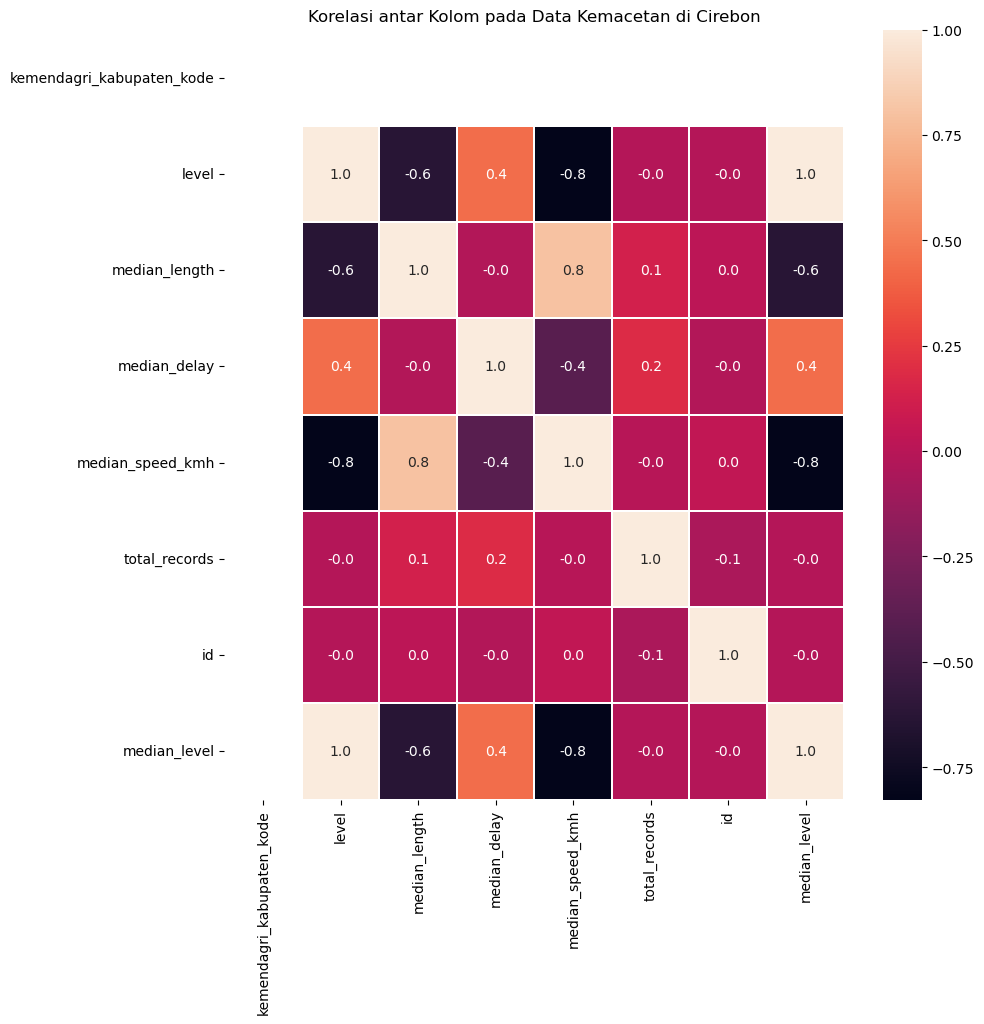

In [10]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True , linewidths=0.01 , fmt='.1f',ax=ax)
plt.title("Korelasi antar Kolom pada Data Kemacetan di Cirebon")
plt.show()

In [11]:
data_med_jams.drop(['median_level'], axis=1)
data_med_jams.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 03:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,1,1840.5,69.0,32.625000,2,33477183,2022-07-06,1.0,"LINESTRING (108.566478 -6.742307, 108.567712 -..."
1,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Sudirman,2,1233.0,71.0,24.740000,7,33477188,2022-07-06,2.0,"MULTILINESTRING ((108.538466 -6.754245, 108.53..."
2,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Jenderal Sudirman,1,793.0,60.5,21.029999,4,33477187,2022-07-06,1.0,"MULTILINESTRING ((108.540309 -6.750729, 108.54..."
3,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,3,654.0,76.0,17.550000,9,33477184,2022-07-06,3.0,"MULTILINESTRING ((108.541192 -6.734419, 108.54..."
4,2022-07-06 06:00:00.000,32.74,KOTA CIREBON,N14 Brigjen Darsono,4,492.0,110.0,9.030000,1,33477185,2022-07-06,4.0,"LINESTRING (108.538898 -6.726917, 108.539027 -..."


c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


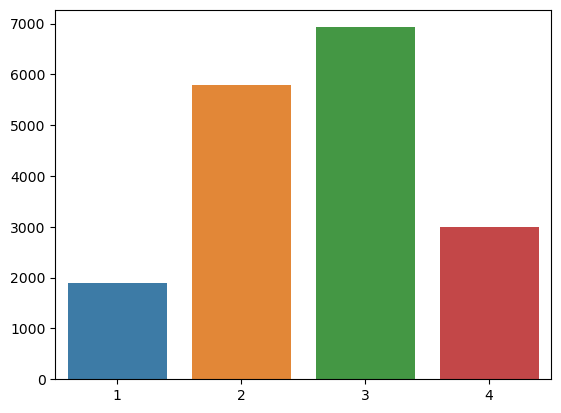

In [12]:
sns.barplot(data_med_jams['level'].value_counts().index, data_med_jams['level'].value_counts().values, alpha=0.95)
plt.show()

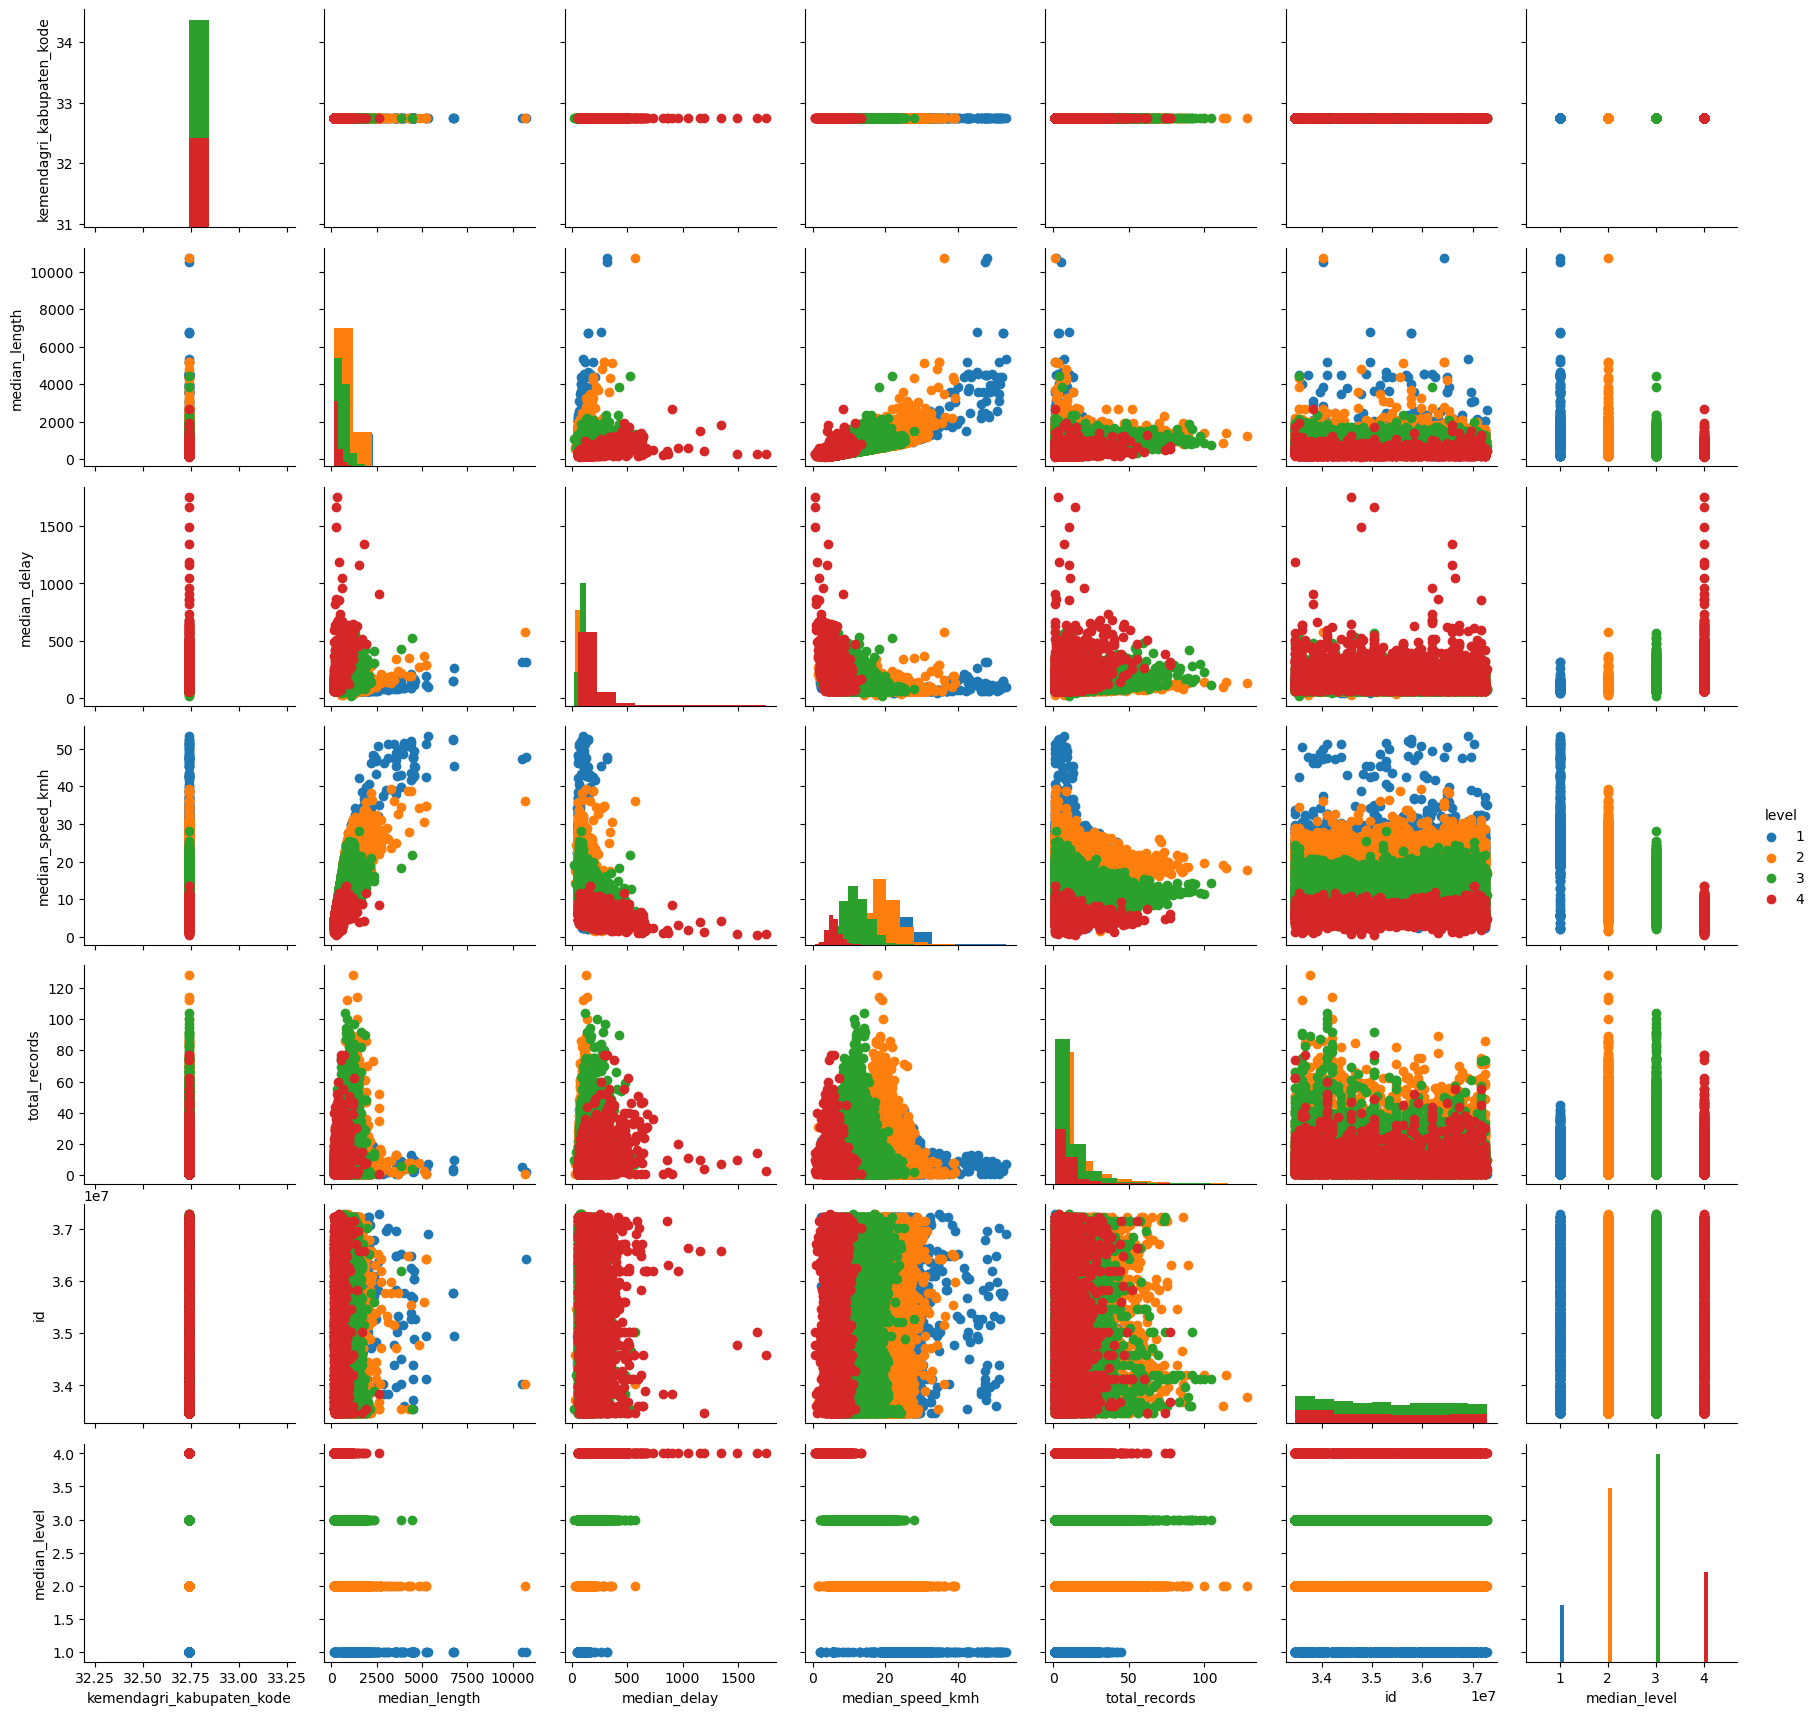

In [13]:
g=sns.PairGrid(data_med_jams,hue="level") # pairgrid=membuat multigrafik, hue=kategorinya dibagi berdasarkan apa (liver non liver)
g.map_diag(plt.hist) #diagonal mau diisi apa? disini histogram
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_speed_kmh', ylabel='Density'>

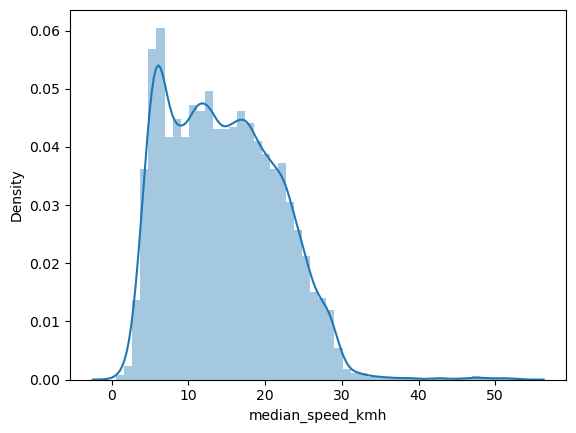

In [13]:
sns.distplot(data_med_jams['median_speed_kmh'])

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_length', ylabel='Density'>

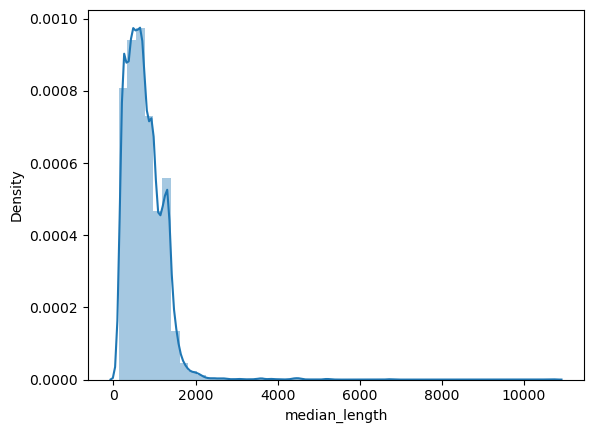

In [14]:
sns.distplot(data_med_jams['median_length'])

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_delay', ylabel='Density'>

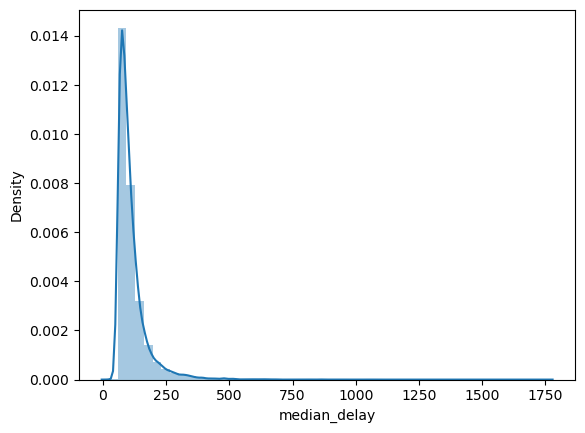

In [16]:
sns.distplot(data_med_jams['median_delay'])

In [8]:
data_med_jams['time'] = pd.to_datetime(data_med_jams['time'], format='%Y-%m-%d %H:%M')
data_med_jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17600 entries, 0 to 17599
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       17600 non-null  datetime64[ns]
 1   kemendagri_kabupaten_kode  17600 non-null  float64       
 2   kemendagri_kabupaten_nama  17600 non-null  object        
 3   street                     17460 non-null  object        
 4   level                      17600 non-null  int64         
 5   median_length              17600 non-null  float64       
 6   median_delay               17600 non-null  float64       
 7   median_speed_kmh           17600 non-null  float64       
 8   total_records              17600 non-null  int64         
 9   id                         17600 non-null  int64         
 10  date                       17600 non-null  object        
 11  median_level               17600 non-null  float64       
 12  geom

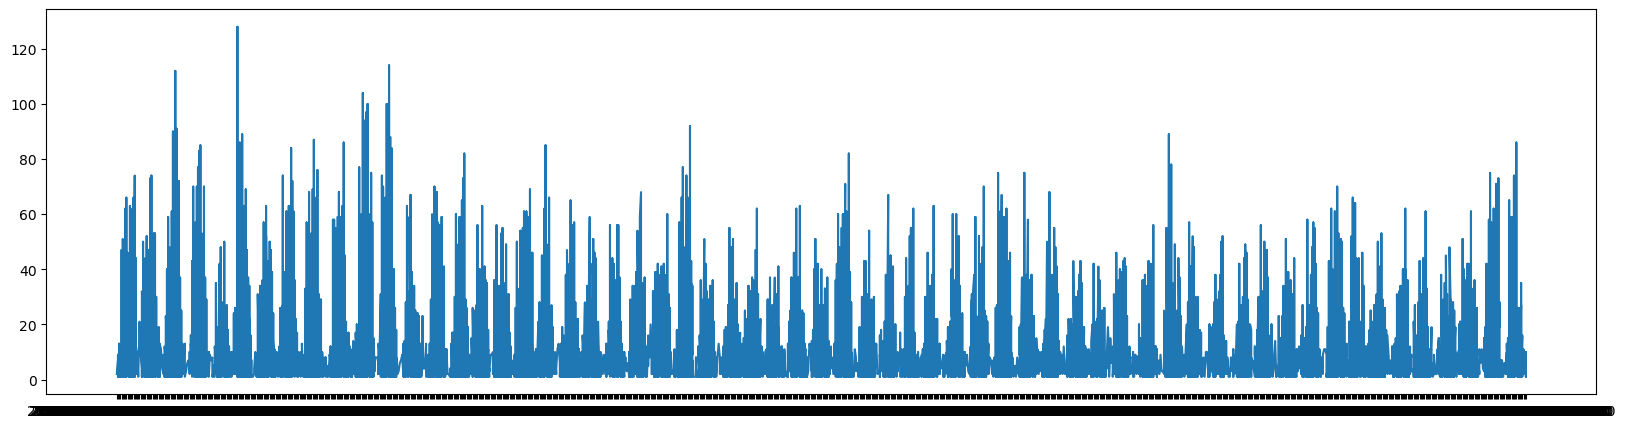

In [17]:
plt.figure(figsize=(20,5))
plt.plot(data_med_jams.time, data_med_jams.total_records)
plt.show()

In [9]:
def weekend_flag(row):
        if row.day_of_week==5 or row.day_of_week==6:
            return 1
        else:
            return 0
        
def data_prep(data_med_jams):
    data_med_jams.index = pd.to_datetime(data_med_jams.time,format='%Y-%m-%d %H:%M')
    data_med_jams.time = pd.to_datetime(data_med_jams.time,format='%Y-%m-%d %H:%M')

    data_med_jams['year'] = data_med_jams.time.dt.year
    data_med_jams['month'] = data_med_jams.time.dt.month
    data_med_jams['day'] = data_med_jams.time.dt.day
    data_med_jams['hour'] = data_med_jams.time.dt.hour

    data_med_jams['day_of_week'] = data_med_jams.time.dt.dayofweek

    data_med_jams['weekend'] = data_med_jams.apply(weekend_flag,axis=1)

    data_med_jams = data_med_jams.drop(['time','id'],axis=1)
    
    return data_med_jams

In [10]:
df = data_prep(data_med_jams)
df.sample(5)

,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,date,median_level,geometry,year,month,day,hour,day_of_week,weekend
time,,,,,,,,,,,,,,,,,
2022-07-16 12:00:00,32.74,KOTA CIREBON,N14 Jenderal Sudirman,1,1325.0,64.0,29.090,2,2022-07-16,1.0,"LINESTRING (108.533883 -6.75889, 108.534841 -6...",2022,7,16,12,5,1
2022-07-23 11:00:00,32.74,KOTA CIREBON,Pangeran Cakrabuana,2,1485.0,90.5,23.895,12,2022-07-23,2.0,"MULTILINESTRING ((108.539553 -6.745921, 108.53...",2022,7,23,11,5,1
2022-09-04 14:00:00,32.74,KOTA CIREBON,N14 Jenderal Sudirman,3,484.0,78.0,13.890,3,2022-09-04,3.0,"MULTILINESTRING ((108.532958 -6.759804, 108.53...",2022,9,4,14,6,1
2022-08-26 17:00:00,32.74,KOTA CIREBON,N1 Kapten Samadikun,3,815.0,64.0,24.345,4,2022-08-26,3.0,"MULTILINESTRING ((108.560021 -6.69907, 108.560...",2022,8,26,17,4,0
2022-08-20 10:00:00,32.74,KOTA CIREBON,Karanggetas,2,182.0,85.0,4.470,1,2022-08-20,2.0,"LINESTRING (108.564912 -6.718389, 108.565669 -...",2022,8,20,10,5,1


In [18]:
from dateutil.relativedelta import relativedelta 

In [19]:
import warnings                                  
warnings.filterwarnings('ignore')
%matplotlib inline

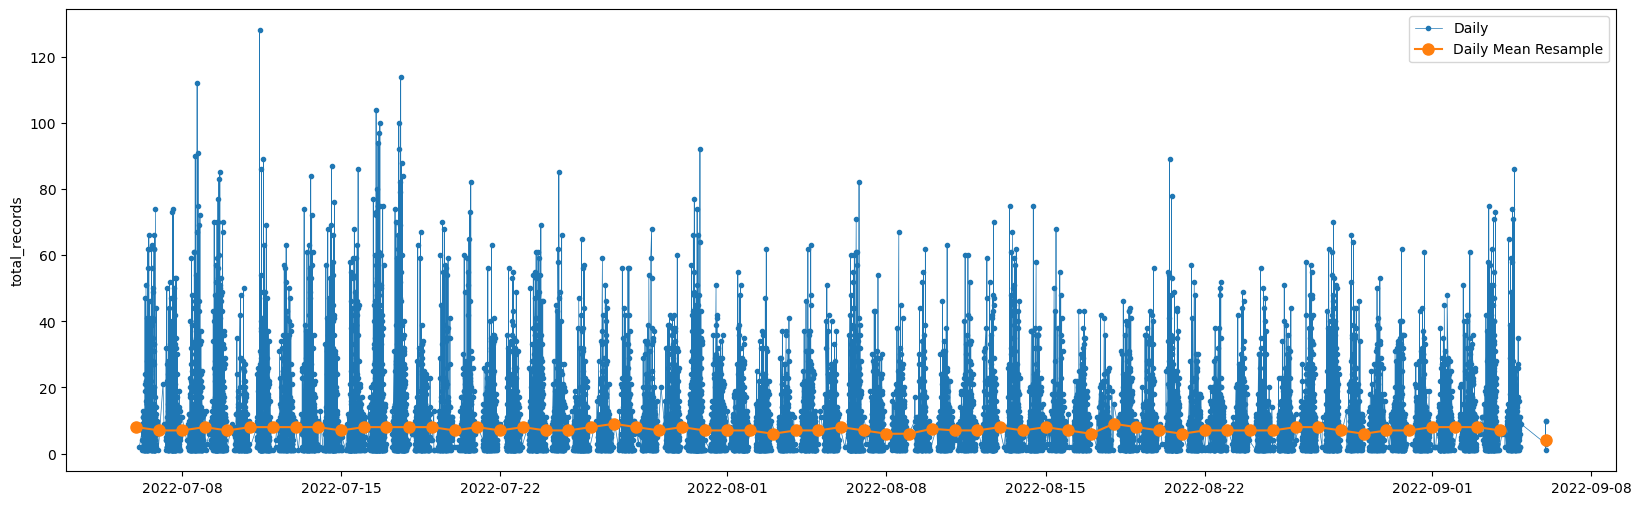

In [100]:
import warnings
import matplotlib.pyplot as plt
y = df['total_records']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y.resample('D').median(),marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('total_records')
ax.legend();

NameError: name 'df_train' is not defined

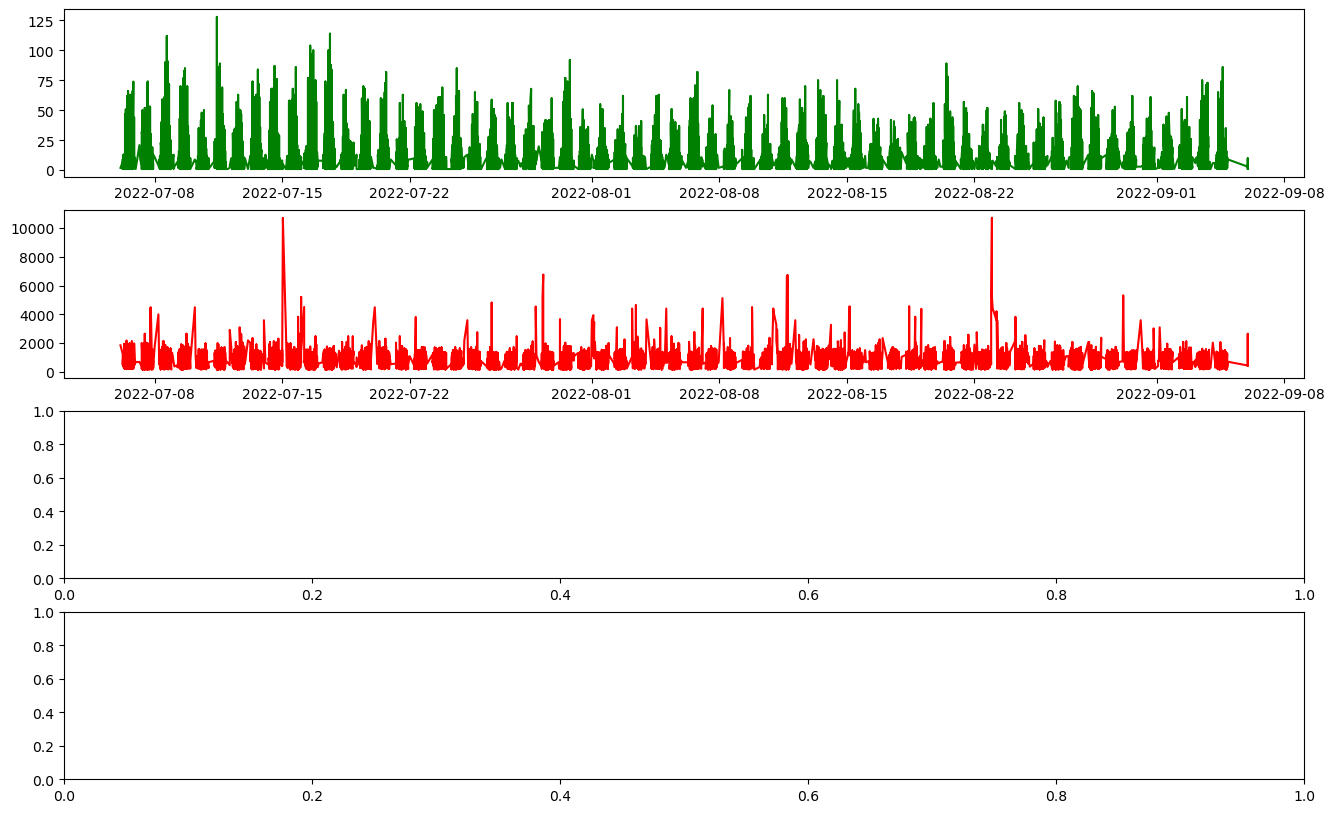

In [20]:
fig,ax = plt.subplots(4,1,figsize=(16,10))
axs = ax.flatten()
axs[0].plot(data_med_jams['total_records'], color='green')
axs[1].plot(data_med_jams['median_length'], color='red')
axs[1].plot(df_train['Count'].resample('D'))
axs[2].plot(data_med_jams['median_delay'], color='black')
axs[3].plot(data_med_jams['median_speed_kmh'])
axs[0].set_title('Total Kendaraan')
axs[1].set_title('Median Panjang Kemacetan (m)')
axs[2].set_title('Median Delay Kemacetan (detik)')
axs[3].set_title('Median Kecepatan Kendaraan dalam Kemacetan (km/jam)')
plt.tight_layout()
plt.show()

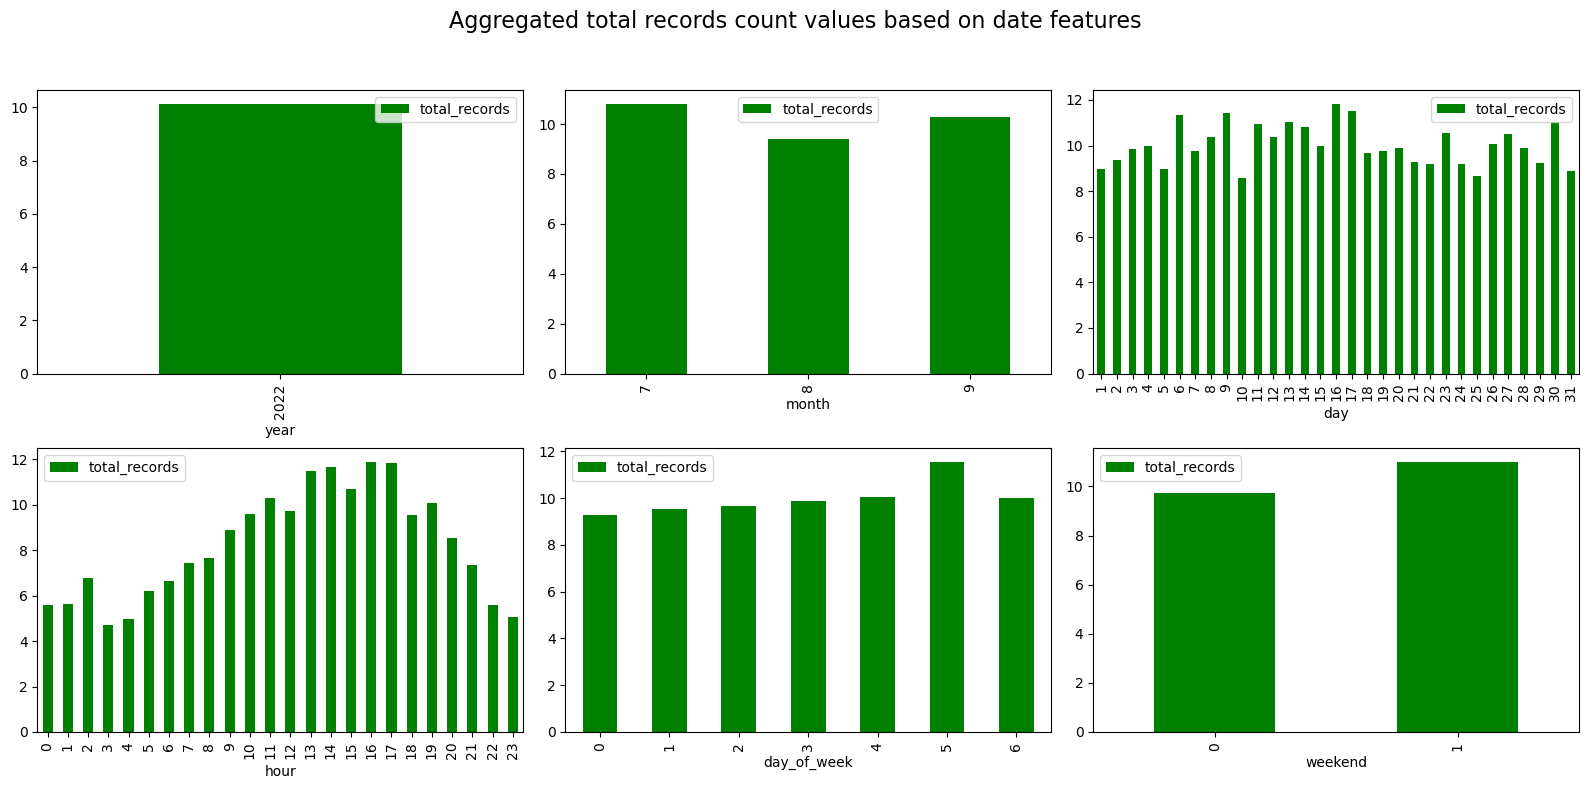

In [23]:
fig,ax = plt.subplots(2,3,figsize=(16, 8))
df.groupby(['year']).agg({'total_records':np.mean}).plot(kind='bar',ax=ax[0][0], color='green')
df.groupby(['month']).agg({'total_records':np.mean}).plot(kind='bar',ax=ax[0][1], color='green')
df.groupby(['day']).agg({'total_records':np.mean}).plot(kind='bar',ax=ax[0][2], color='green')
df.groupby(['hour']).agg({'total_records':np.mean}).plot(kind='bar',ax=ax[1][0], color='green')
df.groupby(['day_of_week']).agg({'total_records':np.mean}).plot(kind='bar',ax=ax[1][1], color='green')
df.groupby(['weekend']).agg({'total_records':np.mean}).plot(kind='bar',ax=ax[1][2], color='green')
fig.suptitle('Aggregated total records count values based on date features',size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

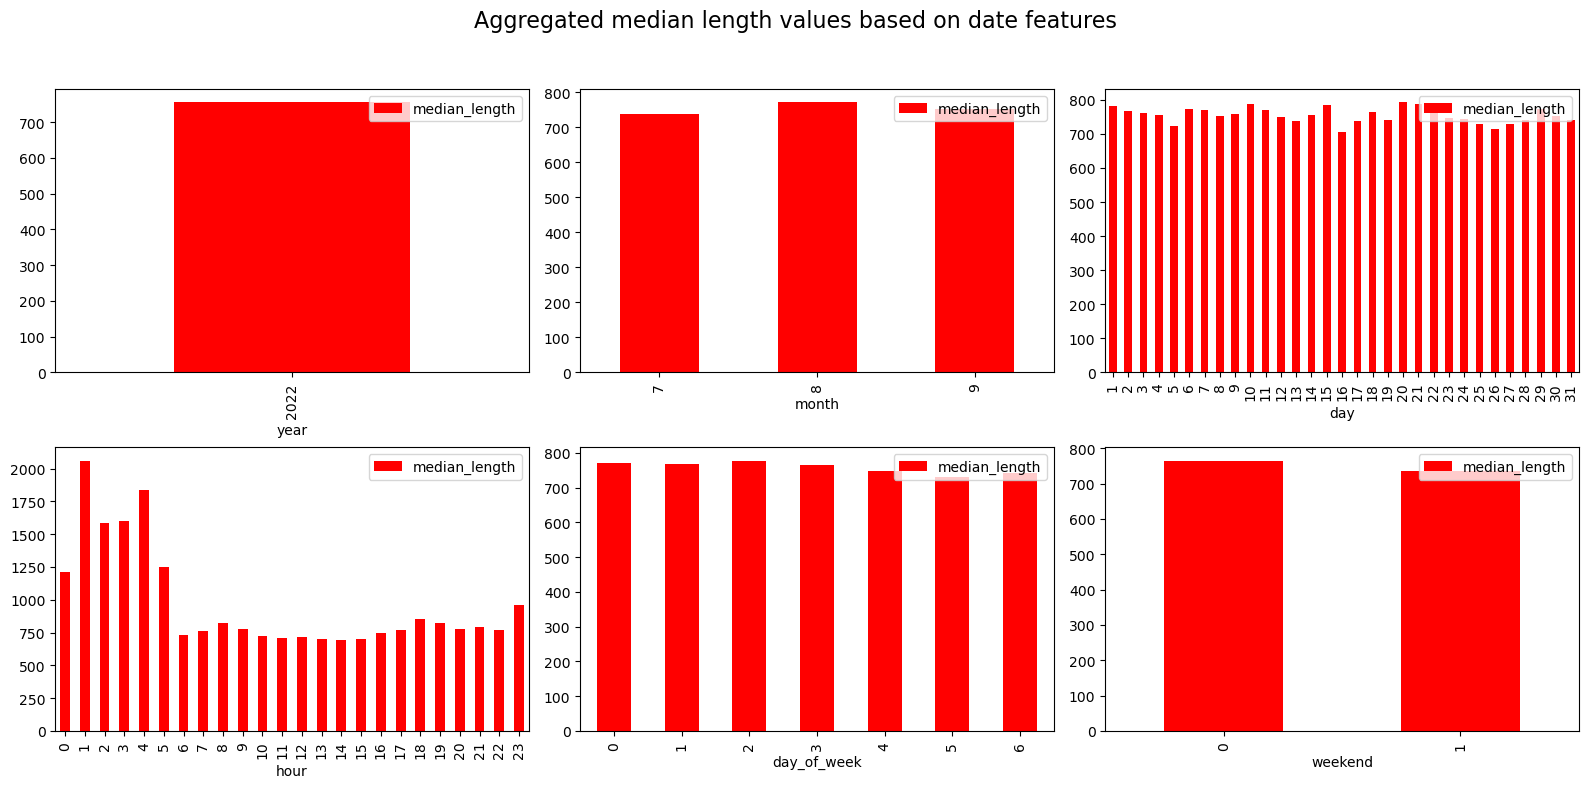

In [25]:
fig,ax = plt.subplots(2,3,figsize=(16, 8))
df.groupby(['year']).agg({'median_length':np.mean}).plot(kind='bar',ax=ax[0][0], color='red')
df.groupby(['month']).agg({'median_length':np.mean}).plot(kind='bar',ax=ax[0][1], color='red')
df.groupby(['day']).agg({'median_length':np.mean}).plot(kind='bar',ax=ax[0][2], color='red')
df.groupby(['hour']).agg({'median_length':np.mean}).plot(kind='bar',ax=ax[1][0], color='red')
df.groupby(['day_of_week']).agg({'median_length':np.mean}).plot(kind='bar',ax=ax[1][1], color='red')
df.groupby(['weekend']).agg({'median_length':np.mean}).plot(kind='bar',ax=ax[1][2], color='red')
fig.suptitle('Aggregated median length values based on date features',size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

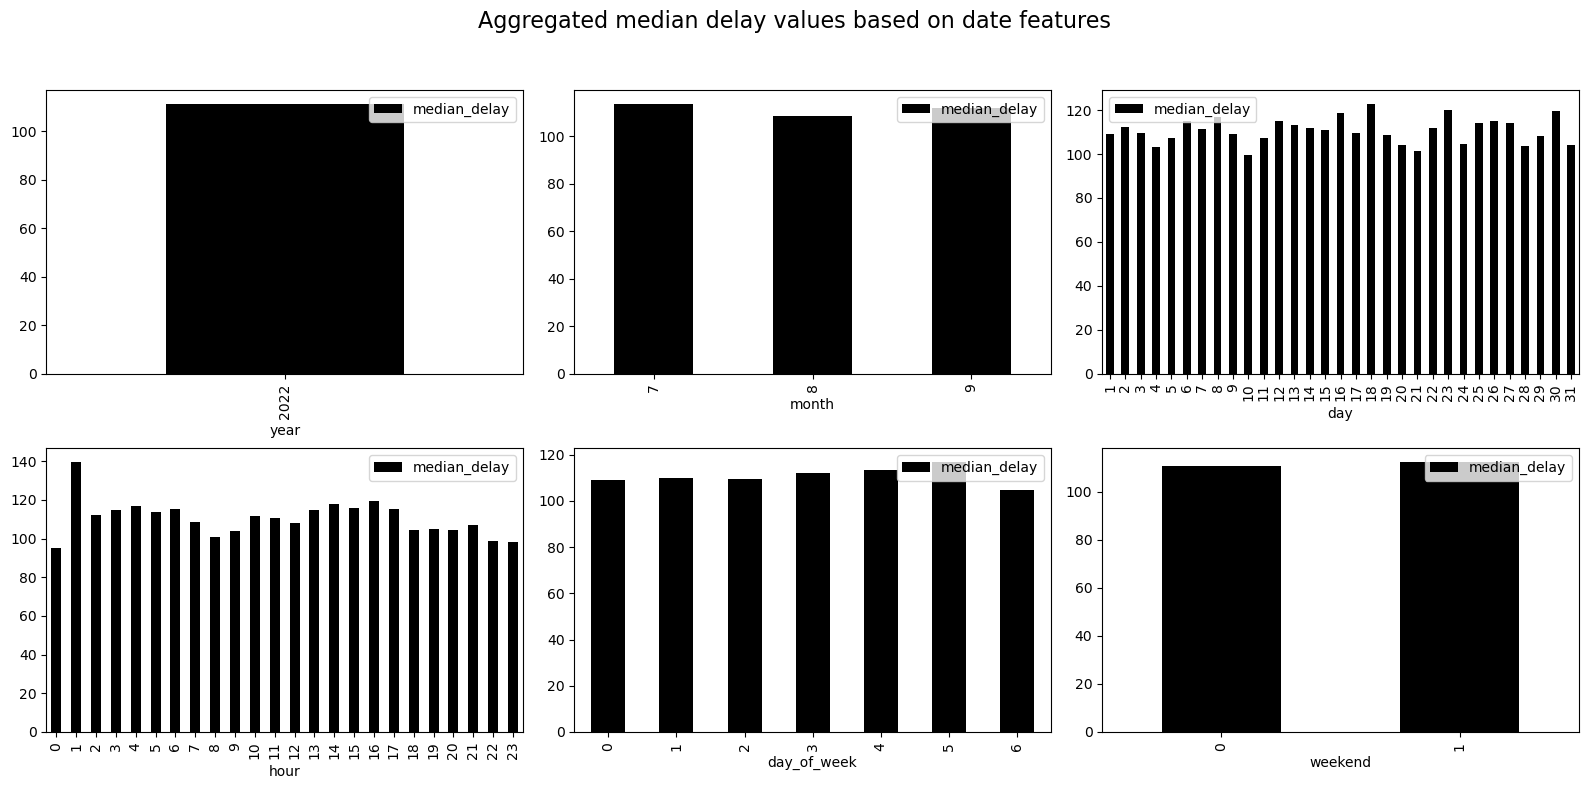

In [26]:
fig,ax = plt.subplots(2,3,figsize=(16, 8))
df.groupby(['year']).agg({'median_delay':np.mean}).plot(kind='bar',ax=ax[0][0], color='black')
df.groupby(['month']).agg({'median_delay':np.mean}).plot(kind='bar',ax=ax[0][1], color='black')
df.groupby(['day']).agg({'median_delay':np.mean}).plot(kind='bar',ax=ax[0][2], color='black')
df.groupby(['hour']).agg({'median_delay':np.mean}).plot(kind='bar',ax=ax[1][0], color='black')
df.groupby(['day_of_week']).agg({'median_delay':np.mean}).plot(kind='bar',ax=ax[1][1], color='black')
df.groupby(['weekend']).agg({'median_delay':np.mean}).plot(kind='bar',ax=ax[1][2], color='black')
fig.suptitle('Aggregated median delay values based on date features',size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

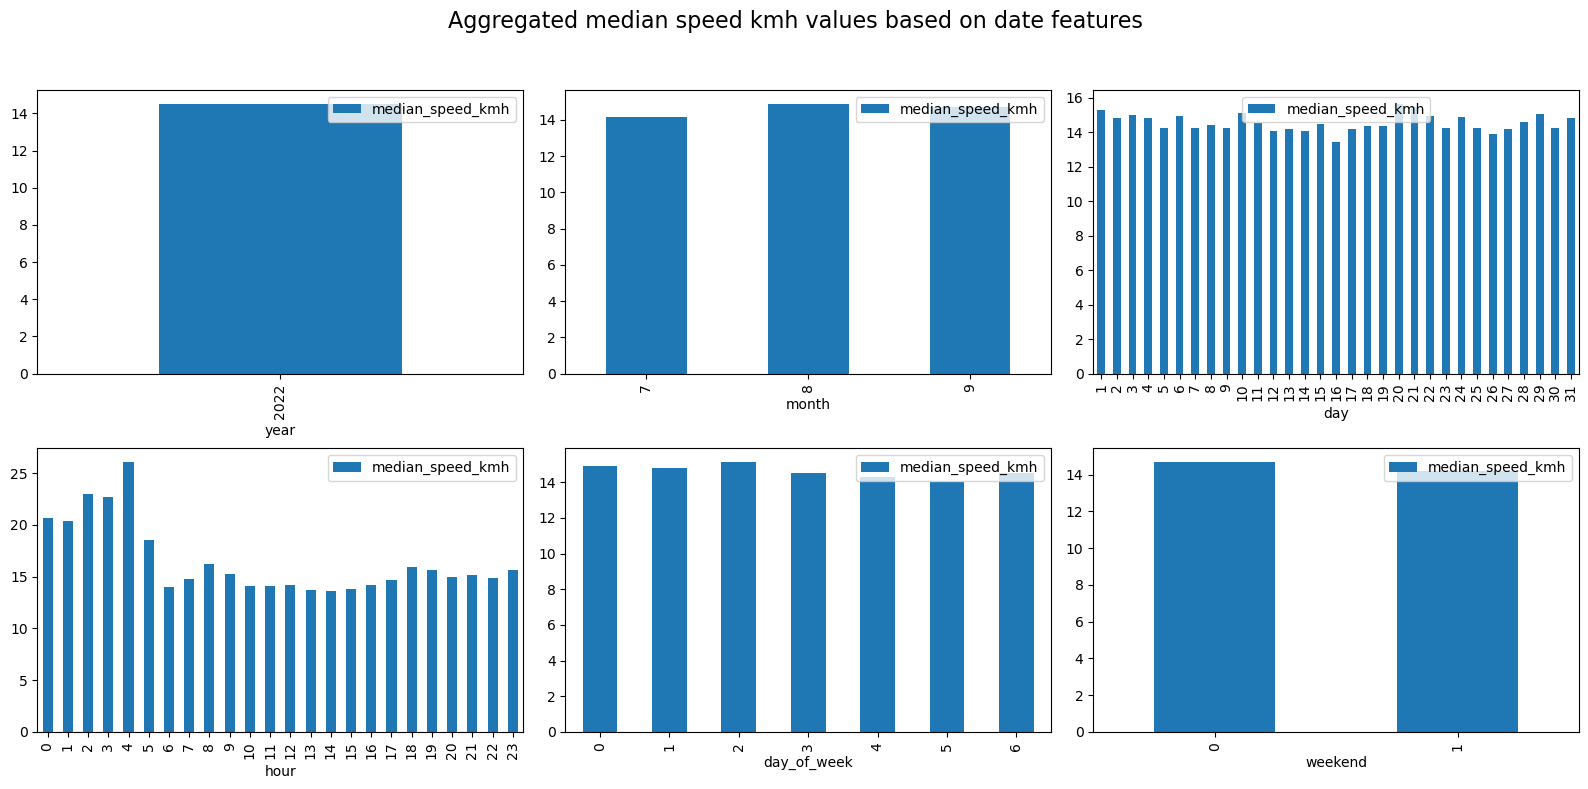

In [27]:
fig,ax = plt.subplots(2,3,figsize=(16, 8))
df.groupby(['year']).agg({'median_speed_kmh':np.mean}).plot(kind='bar',ax=ax[0][0])
df.groupby(['month']).agg({'median_speed_kmh':np.mean}).plot(kind='bar',ax=ax[0][1])
df.groupby(['day']).agg({'median_speed_kmh':np.mean}).plot(kind='bar',ax=ax[0][2])
df.groupby(['hour']).agg({'median_speed_kmh':np.mean}).plot(kind='bar',ax=ax[1][0])
df.groupby(['day_of_week']).agg({'median_speed_kmh':np.mean}).plot(kind='bar',ax=ax[1][1])
df.groupby(['weekend']).agg({'median_speed_kmh':np.mean}).plot(kind='bar',ax=ax[1][2])
fig.suptitle('Aggregated median speed kmh values based on date features',size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [28]:
df1 = gpd.read_file(PATH_DATA+'aggregate_median_jams_Kota Cirebon.csv', ignore_geometry=True)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17600 entries, 0 to 17599
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   time                       17600 non-null  object
 1   kemendagri_kabupaten_kode  17600 non-null  object
 2   kemendagri_kabupaten_nama  17600 non-null  object
 3   street                     17600 non-null  object
 4   level                      17600 non-null  object
 5   median_length              17600 non-null  object
 6   median_delay               17600 non-null  object
 7   median_speed_kmh           17600 non-null  object
 8   total_records              17600 non-null  object
 9   id                         17600 non-null  object
 10  date                       17600 non-null  object
 11  median_level               17600 non-null  object
 12  geometry                   17600 non-null  object
dtypes: object(13)
memory usage: 1.7+ MB


In [30]:
x = df.iloc[:,4:8]
x.sample(5)

,median_length,median_delay,median_speed_kmh,total_records
time,,,,
2022-07-24 09:00:00,438.0,83.0,12.12,5
2022-07-27 15:00:00,599.0,83.0,9.82,15
2022-08-02 10:00:00,661.0,81.0,17.12,11
2022-07-15 21:00:00,684.0,218.0,8.72,15
2022-07-08 15:00:00,301.0,202.0,3.01,23


In [31]:
kmeans=KMeans(n_clusters=3).fit(x)

In [32]:
centroids=kmeans.cluster_centers_
centroids=np.array(centroids)
centroids

array([[ 487.23246812,  115.3170765 ,   10.59359654,    9.01885246],
       [1166.73410096,  104.4174165 ,   20.86100427,   12.07716944],
       [4459.01587302,  178.00793651,   41.73261903,    4.98412698]])

In [33]:
x['clusters'] = kmeans.fit_predict(x)

In [34]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

In [35]:
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(x)

In [36]:
# Import library untuk Clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(x)

KMeans(max_iter=50, n_clusters=4)

In [38]:
kmeans.labels_

array([1, 1, 2, ..., 2, 1, 0])

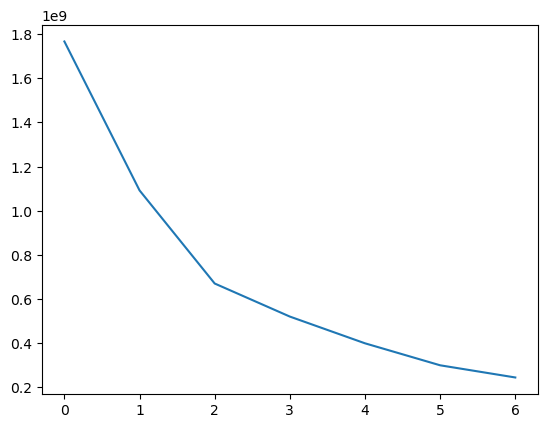

In [39]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [40]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5816917829893596
For n_clusters=3, the silhouette score is 0.5867817910186376
For n_clusters=4, the silhouette score is 0.5323157951915282
For n_clusters=5, the silhouette score is 0.49653563773119697
For n_clusters=6, the silhouette score is 0.4972166651810866
For n_clusters=7, the silhouette score is 0.505526965321876
For n_clusters=8, the silhouette score is 0.48567858509449335


In [41]:
# Final model with k=2
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(x)

KMeans(max_iter=50, n_clusters=3)

In [42]:
# Assign the label
data_med_jams['Cluster_Id'] = kmeans.labels_
data_med_jams.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,year,month,day,hour,day_of_week,weekend,Cluster_Id
time,,,,,,,,,,,,,,,,,,,,
2022-07-06 03:00:00,2022-07-06 03:00:00,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,1,1840.5,69.0,32.625000,2,33477183,2022-07-06,1.0,"LINESTRING (108.566478 -6.742307, 108.567712 -...",2022,7,6,3,2,0,1
2022-07-06 06:00:00,2022-07-06 06:00:00,32.74,KOTA CIREBON,N14 Jenderal Sudirman,2,1233.0,71.0,24.740000,7,33477188,2022-07-06,2.0,"MULTILINESTRING ((108.538466 -6.754245, 108.53...",2022,7,6,6,2,0,1
2022-07-06 06:00:00,2022-07-06 06:00:00,32.74,KOTA CIREBON,N14 Jenderal Sudirman,1,793.0,60.5,21.029999,4,33477187,2022-07-06,1.0,"MULTILINESTRING ((108.540309 -6.750729, 108.54...",2022,7,6,6,2,0,0
2022-07-06 06:00:00,2022-07-06 06:00:00,32.74,KOTA CIREBON,N14 Brigjen Darsono,3,654.0,76.0,17.550000,9,33477184,2022-07-06,3.0,"MULTILINESTRING ((108.541192 -6.734419, 108.54...",2022,7,6,6,2,0,0
2022-07-06 06:00:00,2022-07-06 06:00:00,32.74,KOTA CIREBON,N14 Brigjen Darsono,4,492.0,110.0,9.030000,1,33477185,2022-07-06,4.0,"LINESTRING (108.538898 -6.726917, 108.539027 -...",2022,7,6,6,2,0,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='total_records'>

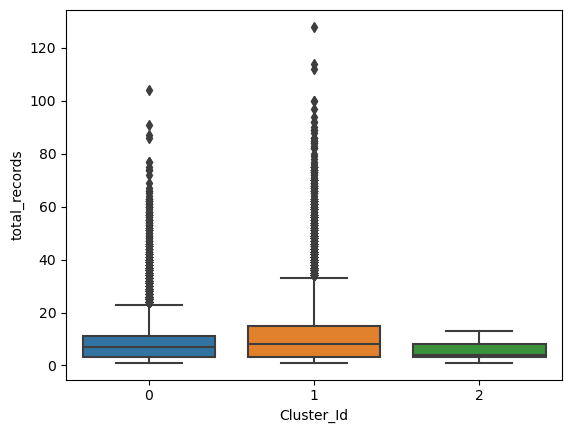

In [43]:
# Boxplot untuk memvisualisasikan Cluster Id dan total_records
sns.boxplot(x='Cluster_Id', y='total_records', data=data_med_jams)

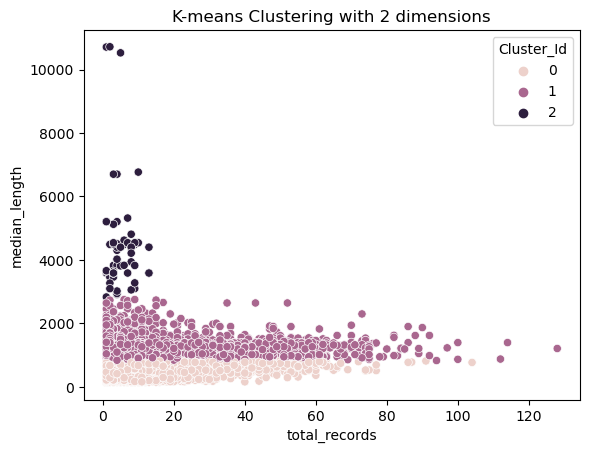

In [44]:
sns.scatterplot(x="total_records", y="median_length", hue=data_med_jams['Cluster_Id'], data=data_med_jams)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [45]:
x.head()

,median_length,median_delay,median_speed_kmh,total_records,clusters
time,,,,,
2022-07-06 03:00:00,1840.5,69.0,32.625000,2,0
2022-07-06 06:00:00,1233.0,71.0,24.740000,7,0
2022-07-06 06:00:00,793.0,60.5,21.029999,4,1
2022-07-06 06:00:00,654.0,76.0,17.550000,9,1
2022-07-06 06:00:00,492.0,110.0,9.030000,1,1


In [46]:
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(x)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [47]:
results['clusters'] =  kmeans.labels_

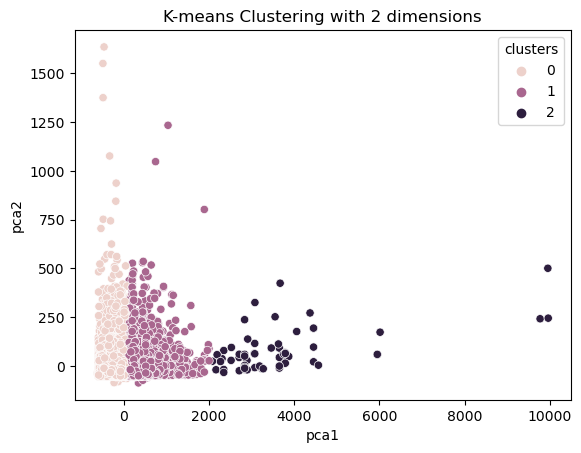

In [48]:
sns.scatterplot(x="pca1", y="pca2", hue="clusters", data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [49]:
results.head()

,pca1,pca2,clusters
0,1086.155434,-39.069888,1
1,478.618690,-39.027050,1
2,38.639604,-51.223085,0
3,-100.432313,-35.998365,0
4,-262.669425,-2.598417,0


In [50]:
feature_pca=pd.DataFrame(reduced_data)
feature_pca

,0,1
0,1086.155434,-39.069888
1,478.618690,-39.027050
2,38.639604,-51.223085
3,-100.432313,-35.998365
4,-262.669425,-2.598417
...,...,...
17595,-317.519938,-33.803692
17596,145.485474,-18.483692
17597,-84.471079,-27.381059
17598,1885.593122,-30.988494


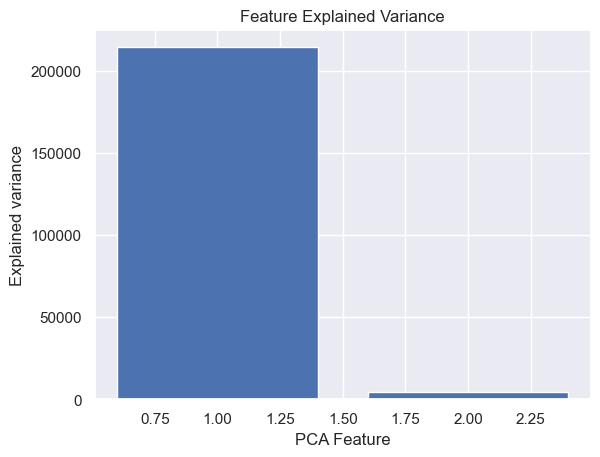

In [51]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
pca.fit_transform(x)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

#pca1 lebih bisa menjelaskan kumpulan variabel sehingga yang dipakai pca 1 saja

<AxesSubplot:xlabel='clusters', ylabel='pca1'>

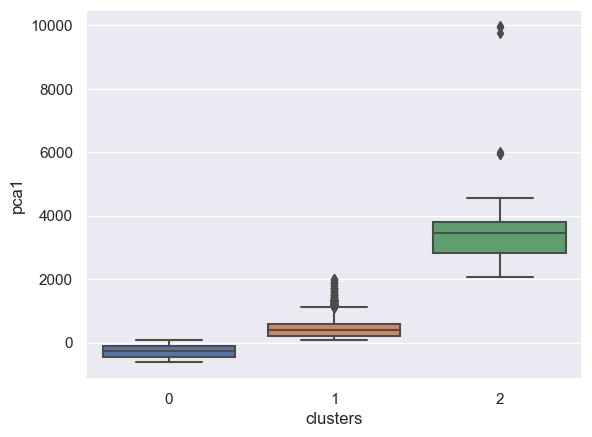

In [52]:
# Boxplot untuk memvisualisasikan Cluster Id dan total_records
sns.boxplot(x='clusters', y='pca1', data=results)

In [53]:
from shapely import wkt

data_med_jams['geometry'] = data_med_jams['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(data_med_jams, crs='epsg:4326')

<AxesSubplot:>

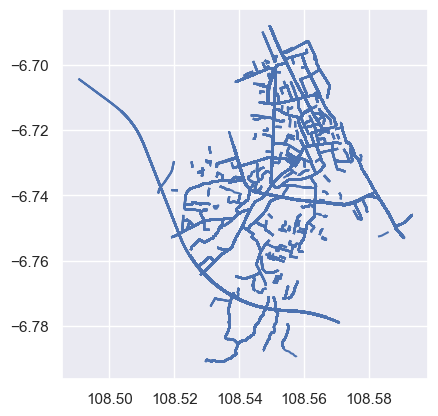

In [54]:
gdf.plot()

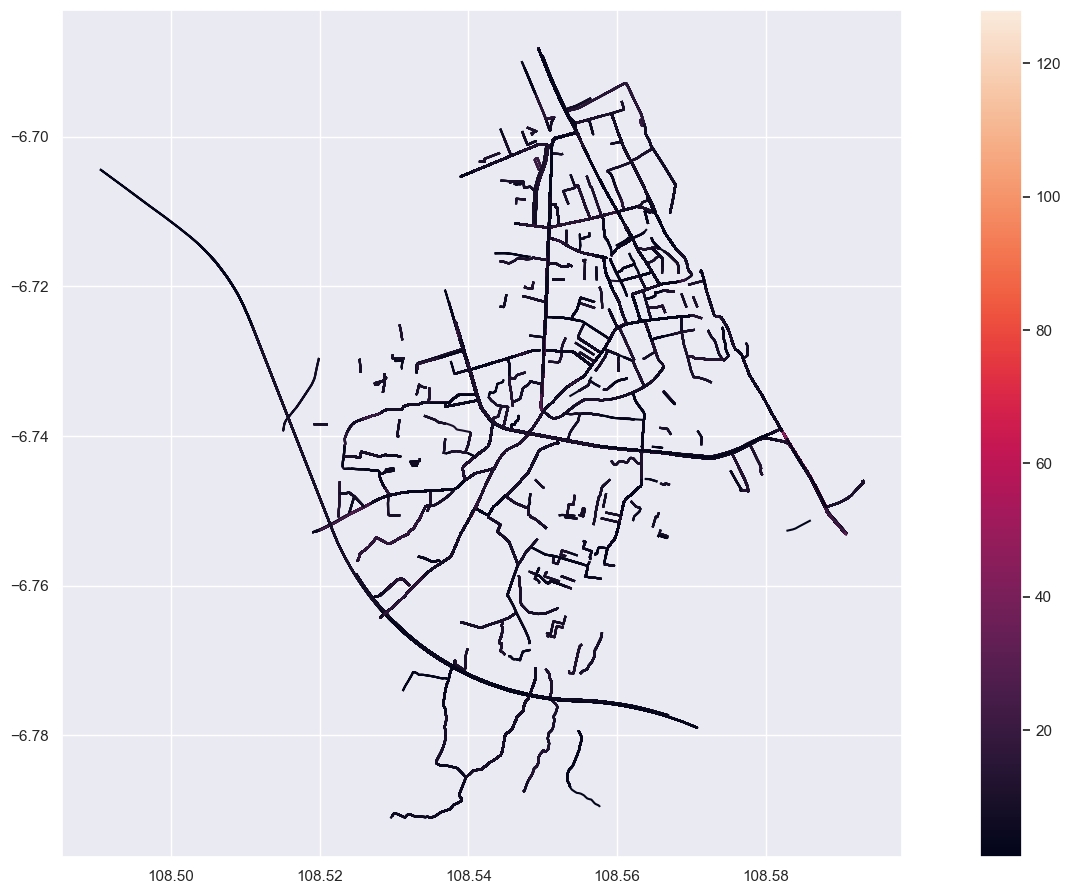

In [184]:
figsize = (20, 11)

gdf.plot('total_records', legend=True, figsize=figsize);

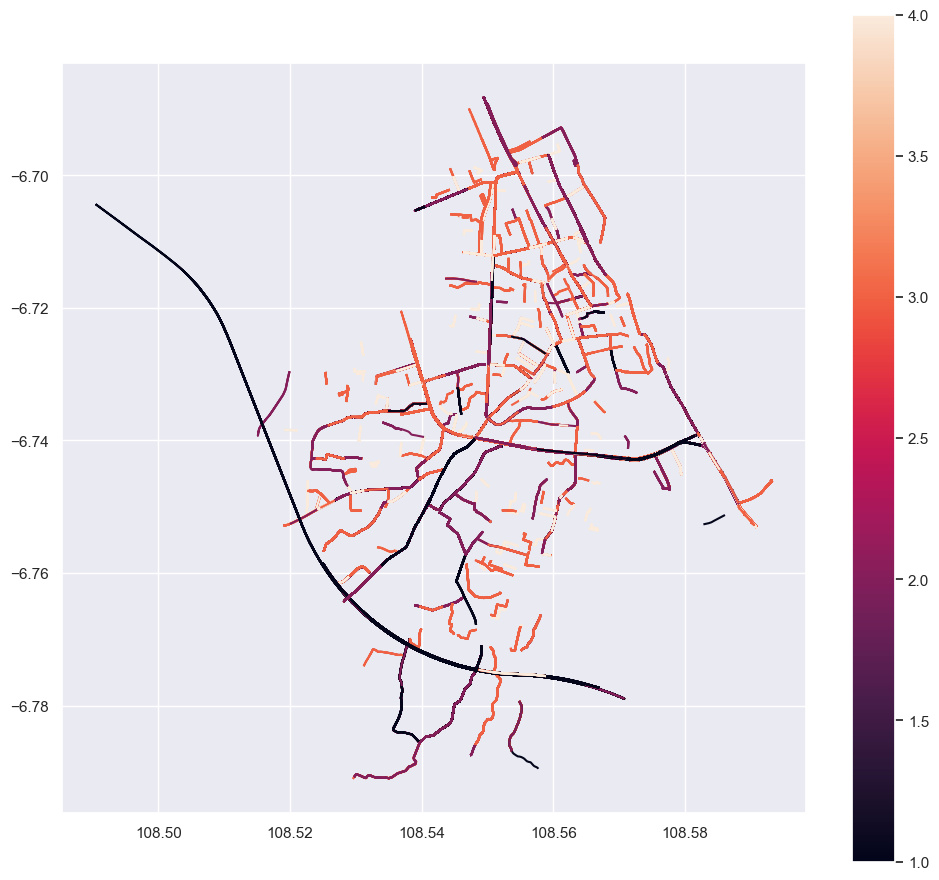

In [84]:
figsize = (12, 11)

gdf.plot('level', legend=True, figsize=figsize);

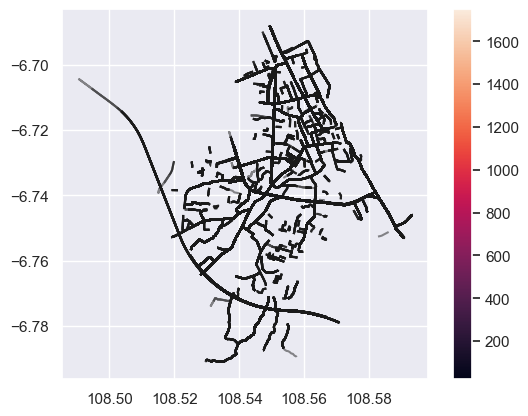

In [193]:
ax = gdf.plot(column='median_delay', alpha=0.5, edgecolor='k', legend=True)

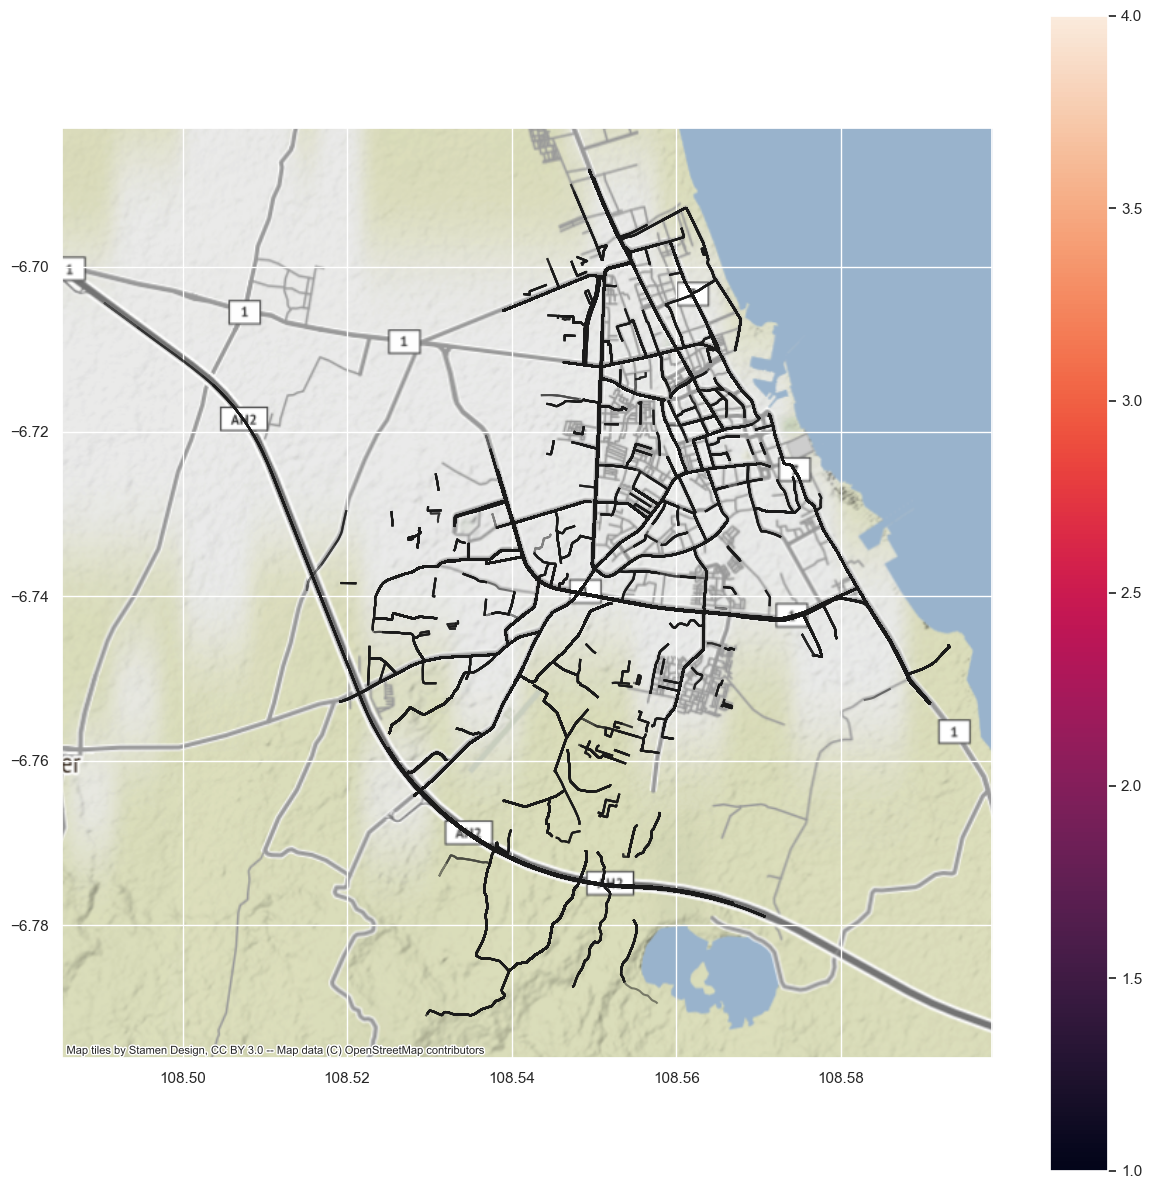

In [85]:
import contextily as ctx
ax = gdf.plot(column='level', figsize=(15, 15), alpha=0.5, edgecolor='k', legend=True)

ctx.add_basemap(
    ax,
    # CRS definition. Without the line below, the map stops making sense
    crs=gdf.crs.to_string(),
)

In [11]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [12]:
df.sample(5)

,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,date,median_level,geometry,year,month,day,hour,day_of_week,weekend
time,,,,,,,,,,,,,,,,,
2022-09-04 15:00:00,32.74,KOTA CIREBON,N14 Jenderal Ahmad Yani,2,1225.0,85.0,23.780,17,2022-09-04,2.0,"MULTILINESTRING ((108.548133 -6.739574, 108.54...",2022,9,4,15,6,1
2022-08-07 11:00:00,32.74,KOTA CIREBON,NaN,3,695.0,104.0,14.070,4,2022-08-07,3.0,"MULTILINESTRING ((108.529721 -6.790807, 108.52...",2022,8,7,11,6,1
2022-08-10 07:00:00,32.74,KOTA CIREBON,N1 Benteng,3,456.0,85.0,13.310,11,2022-08-10,3.0,"MULTILINESTRING ((108.567975 -6.715021, 108.56...",2022,8,10,7,2,0
2022-07-09 17:00:00,32.74,KOTA CIREBON,Dokter Cipto Mangunkusumo,2,1030.0,88.5,20.985,46,2022-07-09,2.0,"MULTILINESTRING ((108.55016 -6.729797, 108.550...",2022,7,9,17,5,1
2022-07-06 18:00:00,32.74,KOTA CIREBON,Dokter Cipto Mangunkusumo,4,1684.0,511.0,8.760,15,2022-07-06,4.0,"MULTILINESTRING ((108.550128 -6.728341, 108.55...",2022,7,6,18,2,0


In [13]:
X = df.iloc[:,4:7]
y = df.level
X.sample(5)

,median_length,median_delay,median_speed_kmh
time,,,
2022-07-21 20:00:00,434.0,71.0,9.890000
2022-07-13 12:00:00,701.0,66.0,12.490000
2022-08-20 18:00:00,694.0,79.0,19.690000
2022-08-15 13:00:00,1222.0,75.0,25.500000
2022-08-11 11:00:00,810.0,65.5,23.580002


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [15]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)

In [16]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [17]:
poly_pred = poly.predict(X_test)

In [18]:
rbf_pred = rbf.predict(X_test)

In [20]:
print(confusion_matrix(y_test,poly_pred))
print(classification_report(y_test,poly_pred))

[[ 153  190    1   10]
 [  55  735  353   23]
 [   1  116 1057  242]
 [   0    0   30  554]]
              precision    recall  f1-score   support

           1       0.73      0.43      0.54       354
           2       0.71      0.63      0.67      1166
           3       0.73      0.75      0.74      1416
           4       0.67      0.95      0.78       584

    accuracy                           0.71      3520
   macro avg       0.71      0.69      0.68      3520
weighted avg       0.71      0.71      0.70      3520



In [21]:
print(confusion_matrix(y_test,rbf_pred))
print(classification_report(y_test,rbf_pred))

[[  38    2  314    0]
 [   3   24 1139    0]
 [   0    0 1416    0]
 [   0    0  584    0]]
              precision    recall  f1-score   support

           1       0.93      0.11      0.19       354
           2       0.92      0.02      0.04      1166
           3       0.41      1.00      0.58      1416
           4       0.00      0.00      0.00       584

    accuracy                           0.42      3520
   macro avg       0.56      0.28      0.20      3520
weighted avg       0.56      0.42      0.27      3520



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf = classifier.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [23]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[ 305   46    2    1]
 [  70  955  136    5]
 [   0  182 1154   80]
 [   1    6   93  484]]
              precision    recall  f1-score   support

           1       0.81      0.86      0.84       354
           2       0.80      0.82      0.81      1166
           3       0.83      0.81      0.82      1416
           4       0.85      0.83      0.84       584

    accuracy                           0.82      3520
   macro avg       0.82      0.83      0.83      3520
weighted avg       0.82      0.82      0.82      3520



In [24]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None)
rf = classifier.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [25]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[ 301   51    1    1]
 [  50  976  136    4]
 [   0  146 1183   87]
 [   1    5   64  514]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.85       354
           2       0.83      0.84      0.83      1166
           3       0.85      0.84      0.85      1416
           4       0.85      0.88      0.86       584

    accuracy                           0.84      3520
   macro avg       0.85      0.85      0.85      3520
weighted avg       0.85      0.84      0.84      3520



In [26]:
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None)
rf = classifier.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [27]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[ 302   50    1    1]
 [  48  986  129    3]
 [   0  142 1193   81]
 [   1    4   66  513]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.86       354
           2       0.83      0.85      0.84      1166
           3       0.86      0.84      0.85      1416
           4       0.86      0.88      0.87       584

    accuracy                           0.85      3520
   macro avg       0.85      0.85      0.85      3520
weighted avg       0.85      0.85      0.85      3520

